In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#Rolling mean is the moving average
df = pd.read_csv('walmart_stock.csv',index_col='Date',parse_dates=True)

In [23]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


<AxesSubplot:xlabel='Date'>

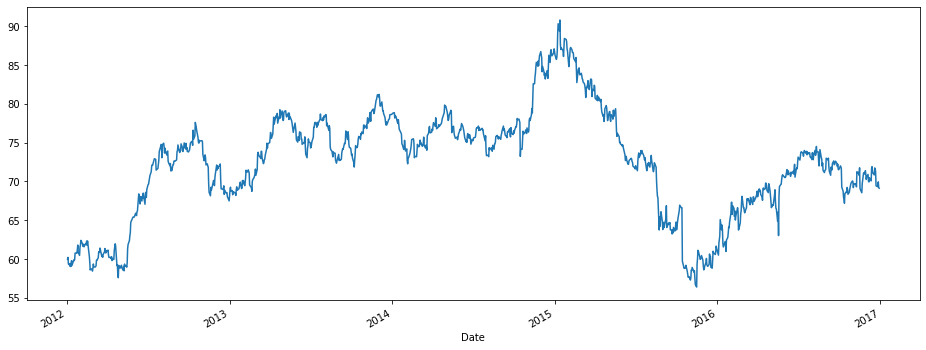

In [24]:
df['Open'].plot(figsize=(16,6))

In [25]:
df.rolling(7).mean().head(14)
#Rolling has arg of windows(which is the number of observations used eg 7 mob=ving average, thats 7 candlesticks, its mean)
#It's like a groupby of the first 7 days where the first 6 are NaN then the 7th days that's their mean as its value
#Then you keep averaging the previous 7 days continuously, so the values are quite similar cuz they are all means of their last 7 days

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

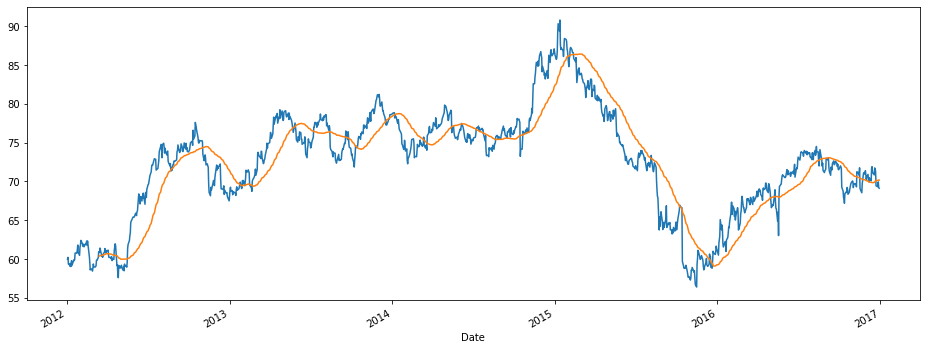

In [26]:
df['Open'].plot()
df.rolling(window=50).mean()['Open'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

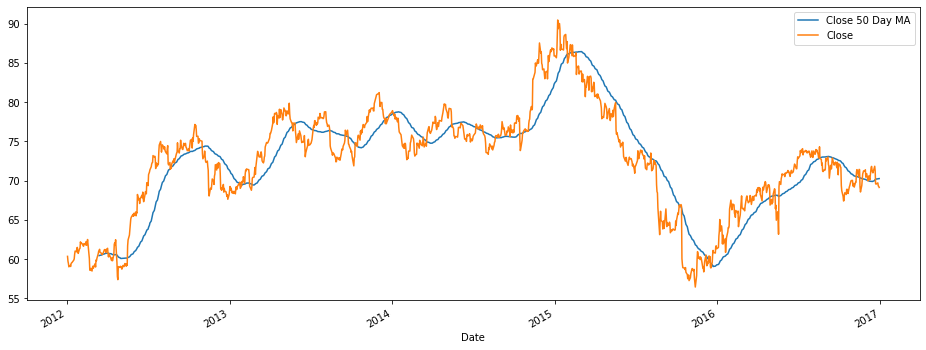

In [27]:
df['Close 50 Day MA'] = df['Close'].rolling(window=50).mean()
df[['Close 50 Day MA','Close']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

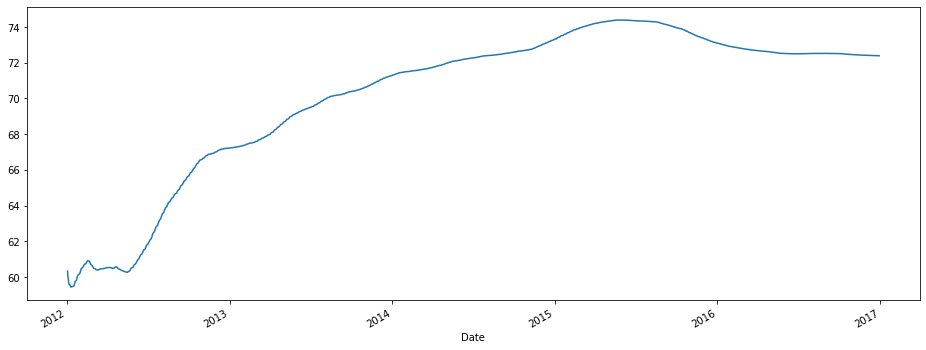

In [28]:
df['Close'].expanding().mean().plot(figsize=(16,6))
#Difference btw expanding n rolling is that expanding doesnt just take the first 7 but everything from the beginning/starting point to where it is

In [29]:
#Bollinger bands are volatility bands placed above n below a MA, the volatility is based off of the STD
#The bands will widen when volatility increases n narrow when volatility decreases.
#BB is used for determining tops n bottoms of the chart or strength of the pair
#When price above upper band(UB) then its overbought when below then oversold, ususlly when it starts coming back to the UB then there will be a correction
#outline the steps first for the BB

<AxesSubplot:xlabel='Date'>

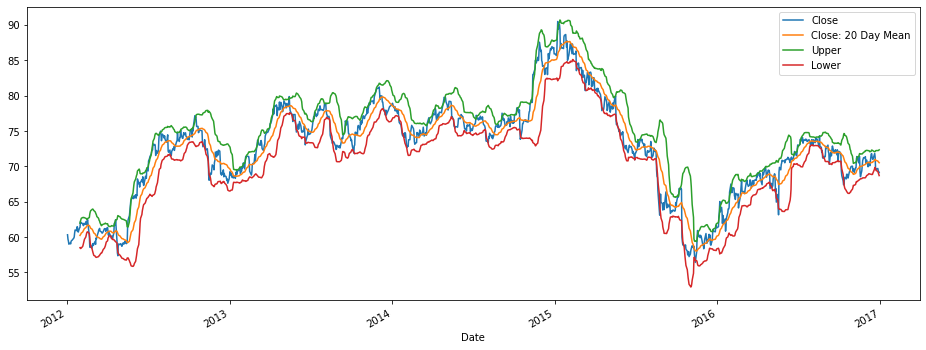

In [30]:
#Close 20 MA
#Upper band = 20MA + 2*STD(20)
#Lower band = 20MA - 2*STD(20)
#Then the Close

df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

#For taking a part either from the  beginning or the end use .head() or .tail()
#df[['Close','Close: 20 Day Mean','Upper','Lower']].tail(120).plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

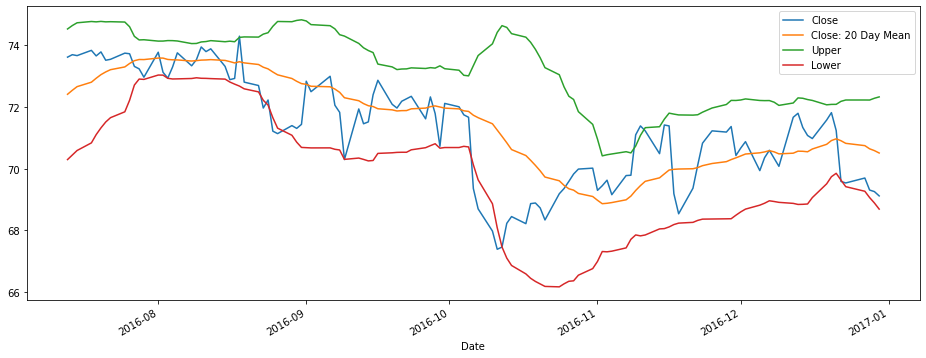

In [31]:
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

df['Upper'] = df['Close: 20 Day Mean'] + 2*(df['Close'].rolling(20).std())
df['Lower'] = df['Close: 20 Day Mean'] - 2*(df['Close'].rolling(20).std())

#df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

#For taking a part either from the  beginning or the end use .head() or .tail()
df[['Close','Close: 20 Day Mean','Upper','Lower']].tail(120).plot(figsize=(16,6))